# Analysis: 


# Countrywise total number of varieties of wines

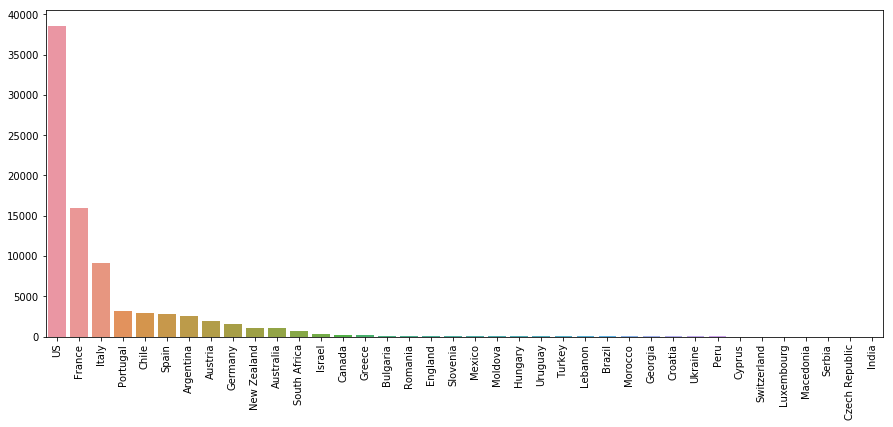

In [67]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df1=pd.read_csv("train.csv")
import seaborn as sns
plt.figure(figsize=(15,6))
varieties=df1['country'].value_counts()
plot=sns.barplot(x=varieties.index,y=varieties.values)
for item in plot.get_xticklabels():
    item.set_rotation(90)

# Wine which is mostly liked by people who has given reviews

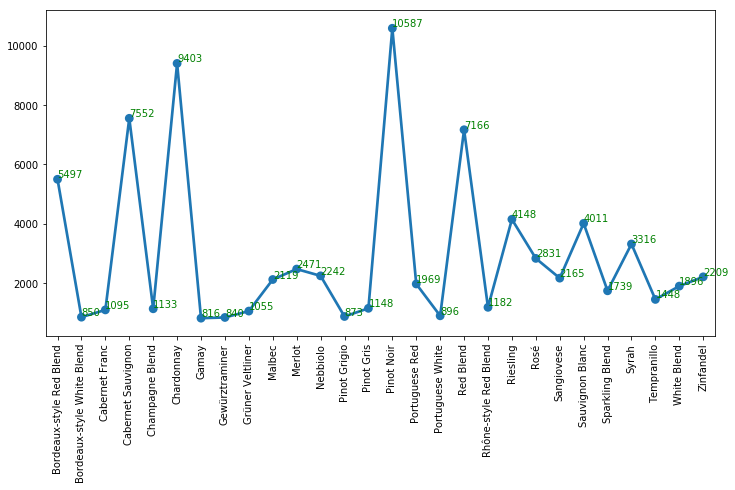

In [47]:
type1=df1.groupby(df1['variety'])['points'].value_counts()
val=[i for i in type1.groupby(level=0).sum()]
#point_val.append(type.index.levels[0])
var=list(type1.index.levels[0])
point_var={}
for i in range(0,len(val),1):
    point_var[var[i]]=val[i]
    #print(point_var[i])
x, y = zip(*sorted(point_var.items()))
plt.figure(figsize=(12,6))
ax=sns.pointplot(x,y)
[ax.text(p[0], p[1]+50, p[1], color='g') for p in zip(ax.get_xticks(), y)]
plt.xticks(rotation=90)
plt.show()

# Which country's wine is less likely among people

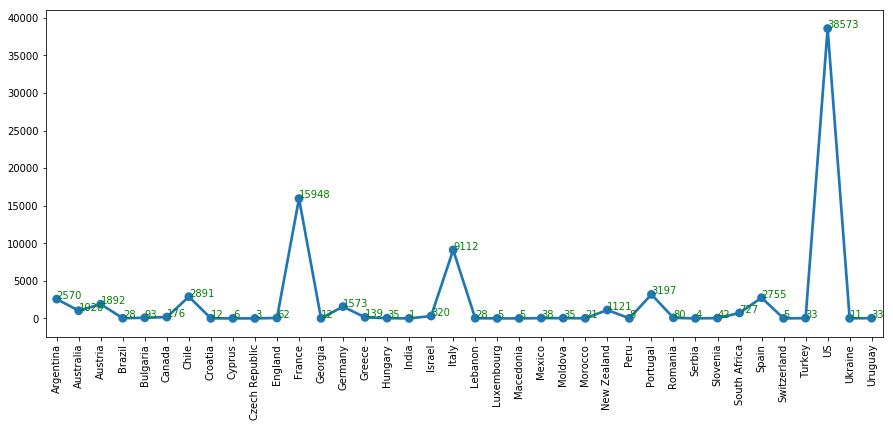

In [64]:
reviews=df1.groupby(['country'])['review_title'].value_counts()
val=[i for i in reviews.groupby(level=0).sum()]
plt.figure(figsize=(15,6))
ax=sns.pointplot(list(reviews.index.levels[0]),val)
[ax.text(p[0], p[1]+50, p[1], color='g') for p in zip(ax.get_xticks(), val)]
plt.xticks(rotation=90)
plt.show()
#ans-India

# Wine which is most expensive among all types of wines of US

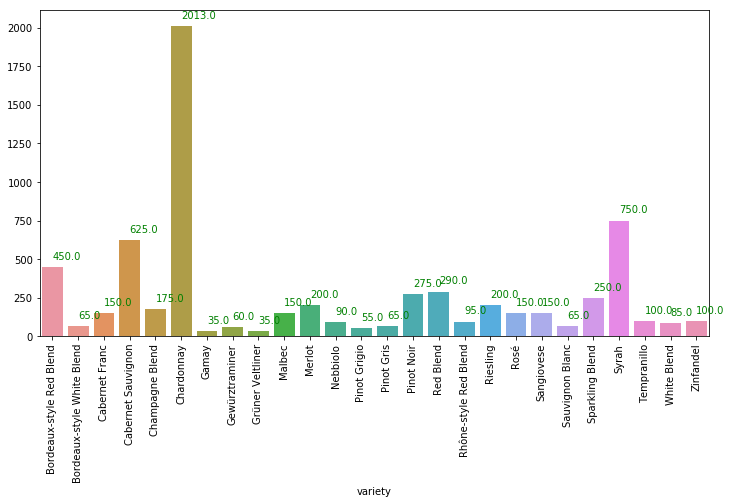

In [48]:
ctr=df1[df1['country']=='US']
max_val=ctr.groupby(['variety'])['price'].max()
plt.figure(figsize=(12,6))
ax=sns.barplot(x=max_val.index,y=max_val.values)
[ax.text(p[0], p[1]+50, p[1], color='g') for p in zip(ax.get_xticks(),max_val.values)]
plt.xticks(rotation=90)
plt.show()
#we can see that wine 'Chardonnay' is having highest price among all types of wines of US. Same way we can derive it for other countries as well.

# Wine which is most expensive in the shop

In [473]:
types=df1.groupby(['country','variety'])['country','variety','price']
filter=types.max()
types=types.apply(pd.DataFrame)
types=types.rename(columns={'country':'c', 'variety':'v', 'price':'p'})
max_val=types['p'].max()
filter= types['p']==max_val
types[types['p']==max_val]
#we can see that France's 'Bordeaux-style Red Blend' is having highest price in the entire dataset.

,c,v,p
60131,France,Bordeaux-style Red Blend,3300.0


# Wineries which has most number of varieties of wines

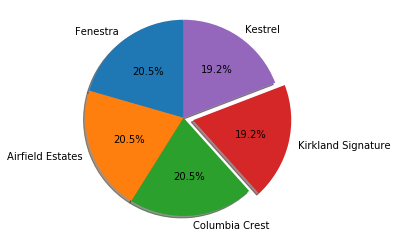

In [45]:
wine_types=df1.groupby(['winery'])['variety'].agg(['unique'])
length=[]
max=0
for i in wine_types['unique']:
    length.append(len(i))
    if(len(i)>max):
        max=len(i)
wine_types['length']=length
wine_types=wine_types.sort_values(by=['length'],ascending=False)
explode=(0,0,0,0.1,0)
plt.pie(wine_types['length'].head(5),explode=explode,labels=wine_types.index[0:5],autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.show()



# Algorithm: Random Forest Classifier

In [68]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#df1=pd.read_csv("train.csv",encoding='utf-8')
df2=pd.read_csv("test.csv")
#fill null values
df1['country']=df1['country'].fillna(df1['country'].value_counts().index[0])
df1['region_2']=df1['region_2'].fillna(df1['region_2'].value_counts().index[0])
df1['designation']=df1['designation'].fillna(df1['designation'].value_counts().index[0])
df1['price']=df1['price'].fillna(df1['price'].value_counts().index[0])
df1['province']=df1['province'].fillna(df1['province'].value_counts().index[0])
df1['region_1']=df1['region_1'].fillna(df1['region_1'].value_counts().index[0])

df2['country']=df2['country'].fillna(df2['country'].value_counts().index[0])
df2['designation']=df2['designation'].fillna(df2['designation'].value_counts().index[0])
df2['price']=df2['price'].fillna(df2['price'].value_counts().index[0])
df2['province']=df2['province'].fillna(df2['province'].value_counts().index[0])
df2['region_1']=df2['region_1'].fillna(df2['region_1'].value_counts().index[0])
df2['region_2']=df2['region_2'].fillna(df2['region_2'].value_counts().index[0])

#convert categorical data into numerical
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df1["country"] = lb_make.fit_transform(df1["country"].astype('str'))
df1["designation"] = lb_make.fit_transform(df1["review_title"].astype('str'))
df1["province"] = lb_make.fit_transform(df1["province"].astype('str'))
df1["region_1"] = lb_make.fit_transform(df1["region_1"].astype('str'))
df1["region_2"] = lb_make.fit_transform(df1["region_2"].astype('str'))
df1["winery"] = lb_make.fit_transform(df1["winery"].astype('str'))

df2["country"] = lb_make.fit_transform(df2["country"].astype('str'))
df2["designation"] = lb_make.fit_transform(df2["review_title"].astype('str'))
df2["province"] = lb_make.fit_transform(df2["province"].astype('str'))
df2["region_1"] = lb_make.fit_transform(df2["region_1"].astype('str'))
df2["region_2"] = lb_make.fit_transform(df2["region_2"].astype('str'))
df2["winery"] = lb_make.fit_transform(df2["winery"].astype('str'))

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x=df1[['country','designation','province','region_1','region_2','winery','price','points']]
y=df1['variety']
x_test=df2[['country','designation','province','region_1','region_2','winery','price','points']]
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
clf=RandomForestClassifier(n_estimators=100)
#clf1.fit(X_train,y_train)
clf.fit(x,y)
y_pred=clf.predict(x_test)
print(y_pred)
from sklearn import metrics
acc1=metrics.accuracy_score(y, clf.predict(x))
print(acc1)

['Pinot Noir' 'Malbec' 'Cabernet Sauvignon' ... 'Pinot Noir' 'Red Blend'
 'Pinot Noir']
0.9997459380330764


In [71]:
#predicted output stored back into test csv file
df2['variety']=y_pred
df2.to_csv('test.csv',index=False)
